### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2018 ###

# Production Planning in Manufacturing#

#### Fong Kirst (fchen69@wisc.edu; 9075075516) and Kelly He (xhe228@wisc.edu; 9078291425)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

**Production planning** is essential for the management of manufacturing to produce the right number of products to satisfy customer demand over a specific time horizon and maximize profit. Our final project is aiming to match production and sourcing decisions to meet market demand subject to production capacity, workforce availability, and overtime restrictions. The objective of the problem is to maximize the profit or minimize the total cost.
<br>
We will solve this problem using two types of mathematical models:<br>
 1. **Deterministic Production Planning Model**<br>
In this approach, we will use the best guess of demand 𝑑 for a period of time, i.e. assume
the demand is given in a time 𝑡, to model and solve the production planning problem.
 2. **Stochastic Production Planning Model**<br>
In this approach, the demand 𝑑 in a period of time is uncertain. However, we are given a set of probabilities associated with demand to find a solution that is feasible for all or almost all the possible data and optimizes the expected performance of the model.


## 2. Mathematical model ##

 1. **Deterministic Production Planning (LP & MIP)**<br>
 
     a. **Decision variables**
      * $x(t)$ is the regular production produced in a period time $t$
      * $𝑦(t)$ is the inventory level at the end of each period of time $t$
      * $𝑧(t) \in \{0, 1\}$
         * 1 if production occurs in time $t$
         * 0 otherwise<br>
    
    b. **Parameters**
      *  $f(t)$ is the workforce cost of producing in time $t$
      *  $c(t)$ is the cost of a unit of production in time $t$
      *  $h(t)$ is the cost of the storage in time $t$
      *  $C$ is the capacity of manufacturing
      *  $d(t)$ is the demand of the product in time $t$<br>
      
    c. **Constraints**
      *  Capacity constraint
      * $ x(t) \ \leq  \ Cz(t), \ \forall t \ \in \ {1, 2, ..., n}$
      *  Nonnegativity and integer constraints
          * $ x(t), \ y(t)  \ \geq 0 \text{ and } z(t) \ \in \{0, 1\}, \ \forall t \in \{1, 2,..., n\}$
      * Storage balance constraint
          * $ y(t - 1) \ + \ x(t) \ = \ d(t) \ + \ y(t), \ \forall t \in \{1,2,...,n\}$<br>
          
    d. **Objective**
    <br>
    $\hspace{60pt} \text{Minimize}$
    $$
    \displaystyle\sum_{t \ = \ 1}^n c(t)x(t) \ + \ \displaystyle\sum_{t \ = \ 1}^n f(t)z(t) \ 
    + \ \displaystyle\sum_{t \ = \ 1}^n h(t)y(t)
    $$
    <br><br>
 
 2. **Stochastic Production Planning Model**<br>
 
    a. **Decision variables**
    * $r_1,r_2,…,r_m$ are the amounts of raw materials that requried to produce $n$ different products, where $i \ = \ 1, 2, ..., m$ and $r_i \geq 0$.
    * $q_1, q_2,…, q_n$ are the quantities of $n$ different products, where $q_j \geq 0$.
     
    b. **Parameters**
    * $ A_{ij}$, to manufacture one unit of product j requires Aij units of raw material i, where $r ≽ Aq$ and $A$ is nonnegative.
    * $ c \in R_{+}^m$, is the cost for raw material $r$. The total cost is $c^Tr$.
    * $ p \in R_{+}^n$, is the vector of product prices. The total profit is $p^Ts \ - \ c^Tr$.
    * $d_1, d_2,…, d_n$ are the demand for product $j$, where $d_i\geq 0$.<br>
    * $ \pi_1,\pi_2,...,\pi_k$, are the probabilities of a set of $K$ possible demand vectors $d^{(1)},...,d^{(k)}$, where $1^T\pi = 1, \ \pi \succeq 0 $.
    * $s_j \ = \ min\{q_j, \ d_j\}$, is the number of units of product $j$ sold, where $ s_j \geq 0$.
        * If $q_j \gt d_j, \ q_j - d_j $ is the amount of product $j$ produced but not sold. 
        * If $q_j \lt d_j, \ q_j - d_j $ is the amount of unmet demand.
    * $C$ is the manufacturing capacity.<br>
    
    c. **Constraints**
    * $ r \succeq Aq$, because manufacturing one unit of product $j$ requires at least $A_{ij}$ units of
      raw material $i$.
    * $q \succeq 0, \ r\succeq 0$. <br>
    
    d. **Objective**
    * **Case I**: Choose $r$ and $q$ before the demand $d$ is known<br>
         We incorporate the probabilities of demand into the model and maximize the expected profit.
         $$
         \begin{align}
         \text{Maximize} \qquad
         & -c^Tr \ + \ \sum_{k \ = \ 1}^K \pi_kp^T min\{q,\ d^k\} \\
         \text{Subject to} \qquad
         & r,q \succeq 0, \ r \succeq Aq, \ k \ =1,...,K
         \end{align}
         $$
         <br><br>
    * **Case II**: Choose $r$ ahead of time, and then $q$ after $d$ is known<br>
    In this case we have variables $r \ \in \ R_{+}^m \ $ and $ \ q^k \in R_{+}^n, \ k \ = \ 1, ...,K,$ where $q^k$ is the product we produce if $d^k$ turns out to be the actual product demand. <br>
    Then, the objective is to maximize the expected profit.<br>
    $$
    \begin{align}
    \text{Maximize} \qquad
    & -c^Tr  \ + \ \sum_{k \ = \ 1}^K \pi_kp^Tq^k \\
    \text{Subject to} \qquad
    & r, d^k, q^k \succeq 0, \ r \succeq Aq^k, \ k \ = \ 1,...K
    \end{align}
    $$
  

## 3. Solution ##
This solution section implements the three models of the optimization problems.
 - The first model solves the production planning with known demands.
 - The second model solves the production planning with unknown demands by choosing the amount of raw materials $r_i, \ i = 1, 2, ..., m$ and the quantities of products first $q_i, \ i = 1, 2, ..., n$, that is, solve the $r$ and $q$ first. Then, computing the maximum expected profit.
 - The third model solves the production planning with unknown demands by choosing $r$ first and then $q$ after $d$ is known. We will use the $r$ computed from the second model to resolve the problem. 

### I. Deterministic Production Planning
We are given vectors of workforce cost, unit production cost, storage cost, demands, and maufacturing capacity in time $t = 1, 2, ..., 24$ (month). We choose the produced product quantity in time $t$, the inventory level at the beginning of time $t$, and production indicater $z$ (1 is on 0 otherwise) as variables to find the optimal solution by minimizing the total cost. 

In [2]:
# Data
raw = readcsv("dpp.csv")

# f(t) -- the workforce cost of producing in time t
f = raw[:, 1][:]

# c(t) -- the cost of a unit of production in time t
c = raw[:, 2][:]

# h(t) -- the cost of the storage in time t
h = raw[:, 3][:]

# C -- the capacity of manufacturing
C = raw[:, 4][:]

# d(t) -- the demand of the product in time t
d1 = raw[:, 5][:]
d2 = raw[:, 6][:]

# Production in a year, i.e. twelve months
t = length(d1)

24

In [3]:
# Deterministic Production Planning Model
using JuMP, Cbc
m = Model(solver = CbcSolver())

# Using First Demand set

@variable(m, x[1:t] >= 0)   # production produced in time t
@variable(m, y[1:t+1] >= 0) # the inventory level at the end of time t
@variable(m, z[1:t], Bin)   # 1 if production occurs in time t, 0 otherwise
@constraint(m, x .<= C.*z)  # production constraints
@constraint(m, y[t+1] == 0) # clear out inventory at the end of production planning

# conservation constraint
@constraint(m, flow[i in 1:t], y[i] + x[i] == d1[i] + y[i+1])
@expression(m, material_cost, sum(c[i].*x[i] for i = 1:t))
@expression(m, storage_cost, sum(h[i]*y[i] for i = 1:t))
@expression(m, labor_cost, sum(f[i]*z[i] for i = 1:t))
@objective(m, Min, material_cost + storage_cost + labor_cost)

status1 = solve(m)

xx1 = getvalue(x)
yy1 = getvalue(y)
zz1 = getvalue(z)
ob1 = getobjectivevalue(m)

# Using second demand set
m = Model(solver = CbcSolver())

@variable(m, x[1:t] >= 0)   # production produced in time t
@variable(m, y[1:t+1] >= 0) # the inventory level at the end of time t
@variable(m, z[1:t], Bin)   # 1 if production occurs in time t, 0 otherwise
@constraint(m, x .<= C.*z)  # production constraints
@constraint(m, y[t+1] == 0) # clear out inventory at the end of production planning

# conservation constraint
@constraint(m, flow[i in 1:t], y[i] + x[i] == d2[i] + y[i+1])
@expression(m, material_cost, sum(c[i].*x[i] for i = 1:t))
@expression(m, storage_cost, sum(h[i]*y[i] for i = 1:t))
@expression(m, labor_cost, sum(f[i]*z[i] for i = 1:t))
@objective(m, Min, material_cost + storage_cost + labor_cost)

status2 = solve(m)

xx2 = getvalue(x)
yy2 = getvalue(y)
zz2 = getvalue(z)
ob2 = getobjectivevalue(m)

print("The first model is ")
print_with_color(:light_blue, status1, "\n")
print("The total minimum cost with demand one is ")
print_with_color(:light_blue,ob1 , "\n")
# println("Month Production Inventory Producing State")
# for i = 1:t
#     print(i, "\t", round(xx[i], 1), "\t\t", round(yy[i], 1) , "\t\t", round(zz[i], 1), "\n")
# end
print("The second model is ")
print_with_color(:light_blue, status2, "\n")
print("The total minimum cost with demand two is ")
print_with_color(:light_blue,ob2 , "\n")

The first model is Optimal
The total minimum cost with demand one is 3.4077e7
The second model is Optimal
The total minimum cost with demand two is 2.64138e7


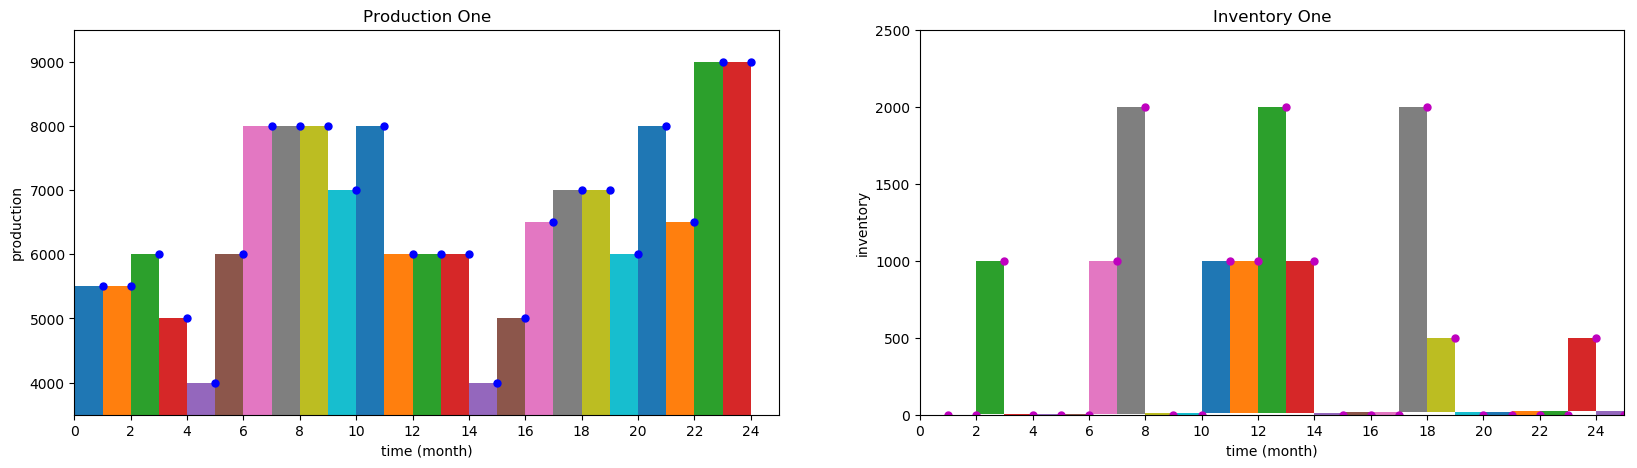

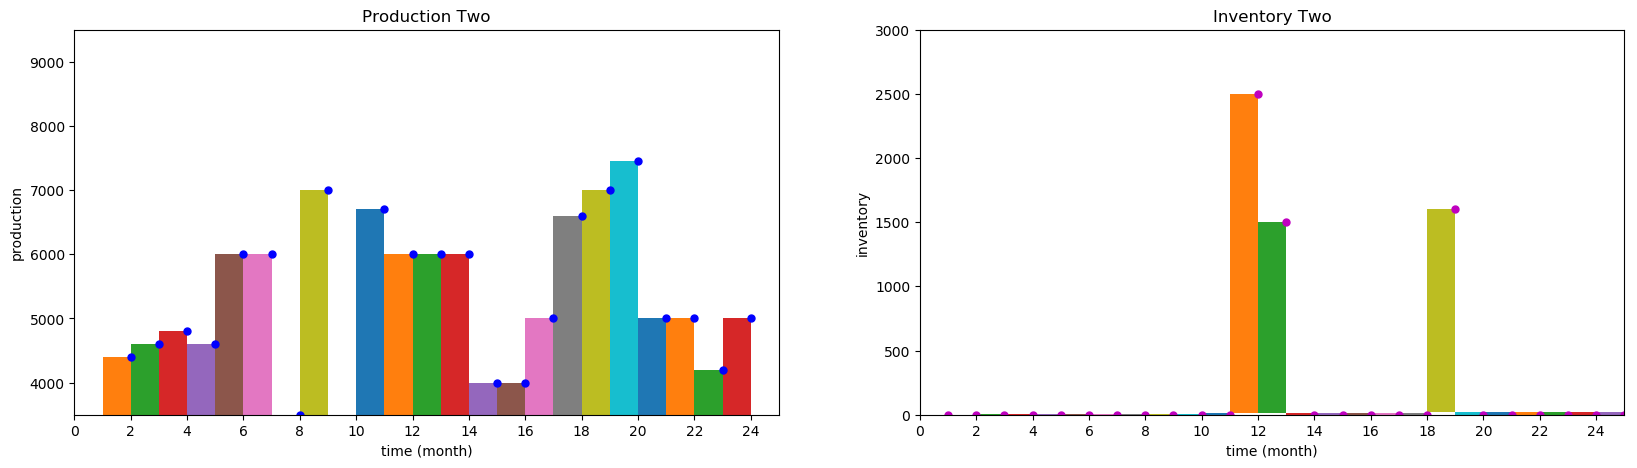

In [4]:
using PyPlot
t1 = 1:24
t2 = 1:25
figure(figsize = (20, 5))
subplot(1, 2, 1)
plot(t1, xx1, "b.", markersize = 10)
xticks(0:2:24)
yticks(0:1000:9500)
axis([0,25,3500,9500])
xlabel("time (month)")
ylabel("production")
title("Production One")
for i in t1
    a = [i-1, i-1, i, i]
    b = [i-1, xx1[i], xx1[i], i-1]
    fill(a, b)
end

subplot(1, 2, 2)
plot(t2, yy1, "m.", markersize = 10)
xticks(0:2:24)
yticks(0:500:2500)
axis([0,25,0,2500])
xlabel("time (month)")
ylabel("inventory")
title("Inventory One")
for i in t2
    a = [i-1, i-1, i, i]
    b = [i-1, yy1[i], yy1[i], i-1]
    fill(a, b)
end

figure(figsize = (20, 5))
subplot(1, 2, 1)
plot(t1, xx2, "b.", markersize = 10)
xticks(0:2:24)
yticks(0:1000:9500)
axis([0,25,3500,9500])
xlabel("time (month)")
ylabel("production")
title("Production Two")
for i in t1
    a = [i-1, i-1, i, i]
    b = [i-1, xx2[i], xx2[i], i-1]
    fill(a, b)
end

subplot(1, 2, 2)
plot(t2, yy2, "m.", markersize = 10)
xticks(0:2:24)
yticks(0:500:3000)
axis([0,25,0,3000])
xlabel("time (month)")
ylabel("inventory")
title("Inventory Two")
for i in t2
    a = [i-1, i-1, i, i]
    b = [i-1, yy2[i], yy2[i], i-1]
    fill(a, b)
end

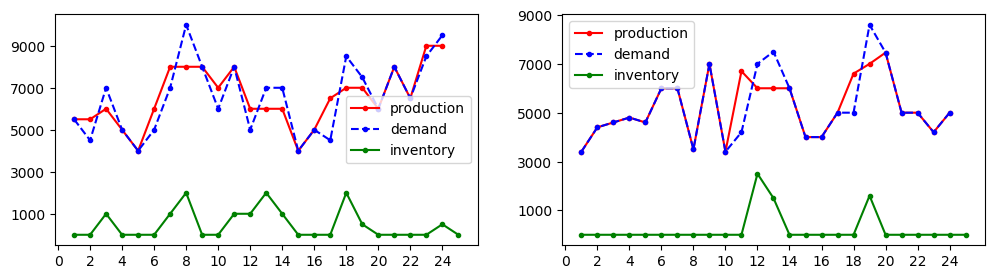

In [5]:
using PyPlot
# production with demand one
figure(figsize = (12, 3))
subplot(1, 2, 1)
plot(t1, xx1, "r.-")
plot(t1, d1, "b.--")
plot(t2, yy1, "g.-")
xticks(0:2:24)
yticks(1000:2000:9500)
legend(["production", "demand", "inventory"], loc = "best");

# production with demand two
subplot(1, 2, 2)
plot(t1, xx2, "r.-")
plot(t1, d2, "b.--")
plot(t2, yy2, "g.-")
xticks(0:2:24)
yticks(1000:2000:9500)
legend(["production", "demand", "inventory"], loc = "best");

### II.  Stochastic Production Planning 

**Stage I: Choose $r$ and $q$ before the demand is known**

In [11]:
# Data
raw2 = readcsv("spp.csv")
(a, b) = size(raw2)
unit_material = 5:9
demand = 10:b

# M -- number of raw materials
M = 10

# N -- number of products
N = 5

# π -- the probability of a set of the possible demand vectors
π = raw2[:,1][:]

# K -- number of possibility vectors 
K = length(π)

# c -- the cost for raw material r.
c = raw2[:,2][:]
c = c[1:M]

# p -- the vector of product prices
p = raw2[:,3][:]
p = p[1:N]

# C -- the manufacturing capacity
#C = 300
C = raw2[:, 4][:]
C = C[1:N]

# A -- units of raw material i needed for one unit of product j
A = raw2[:, unit_material]
A = A[1:10,1:5]

# possible demand vectors associated with the probabilities
D = raw2[:, demand]
D = D'


temp1 = rand(1:2,1,N)
temp1 = [1  1  1  2  1]

1×5 Array{Int64,2}:
 1  1  1  2  1

In [12]:
# Undeterministic Production Planning Model Case I
using JuMP, Cbc, Clp, Gurobi
m = Model(solver = CbcSolver())
#m = Model(solver = GurobiSolver(OutputFlag = 0))

@variable(m, r[1:M] >= 0) # amount of each raw material to buy
@variable(m, q[1:N] >= 0, Int) # amount of each product to manufacture
# @variable(m, t[1:N] >= 0) # extra variable to calculate the min
@constraint(m, r .>= A*q) # material constraint

# quantity of each q is randomly generated
for i in 1:N
    if temp1[i] == 1
      #upper bound
      @constraint(m, sum(q[i]) >= sum(D[i,:] .* π))
    else
      #upper bound
      @constraint(m, sum(q[i]) <= sum(D[i,:] .* π))
      #lower bound
      @constraint(m, sum(q[i]) >= sum(D[i,:] .* π *0.5)) 
    end
end

@constraint(m, q .<= C)
@expression(m, cost, c.*r)
@objective(m, Max, -sum(cost) + sum(p.*q))
solve(m)

q1 = getvalue(q)
r1 = getvalue(r)
o1 = getobjectivevalue(m) #profit

println("The cost of each product:")
for i in 1:N
    print_with_color(:light_red,(c.*r1)[i],"\n")
end

println("The profit of each product(one unit): ")
for i in 1:N
    print_with_color(:light_blue,p[i]-(c.*r1)[i],"\n")
end

println("The profit of each product(after production):")
for i in 1:N
    print_with_color(:green,-(c.*r1)[i] + q1[i]*p[i],"\n")
end

println("The number of materials to buy:")
print_with_color(:light_blue, "\t", r1, "\n\n")
print("The number of products to produce: ")
print_with_color(:light_magenta, q1, "\n\n")
print("The expected profit(not considering demand): ")
print_with_color(:light_blue, o1, "\n\n")

S = min.(q1*ones(1,K),D)

S_graph = [20.0 11.0 1.0 18.0 12.0 14.0 11.0 15.0 14.0 12.0 13.0 12.0 12.0 14.0 30.0; 
          15.0 13.0 14.0 17.0 20.0 12.0 14.0 12.0 11.0 14.0 11.0 13.0 11.0 11.0 17.0; 
          20.0 14.0 13.0 12.0 12.0 14.0 16.0 18.0 13.0 12.0 13.0 16.0 12.0 16.0 10.0; 
         16.0 12.0 15.0 12.0 16.0 16.0 12.0 16.0 14.0 15.0 14.0 14.0 12.0 14.0 16.0;
         12.0 15.0 11.0 15.0 17.0 13.0 11.0 13.0 19.0 12.0 19.0 10.0 13.0 18.0 16.0]
print("The actual profit: ")
print_with_color(:green, -sum(c.*r1) + sum(p .*S*π))

The cost of each product:
3.42312
7.8707199999999995
1.66244
6.09684
1.6506
The profit of each product(one unit): 
31.57688
42.12928
58.33756
17.90316
34.3494
The profit of each product(after production):
3496.57688
4992.12928
5998.33756
377.90316
4318.349400000001
The number of materials to buy:
	[67.12, 89.44, 127.88, 88.36, 110.04, 54.72, 82.32, 66.56, 90.2, 81.88]

The number of products to produce: [100.0, 100.0, 100.0, 16.0, 120.0]

The expected profit(not considering demand): 19161.791360000003

The actual profit: 2836.37136

**Observation: ** <br>
 
| No. | Random no.     | Quantity of Product               | Expected Profit | Actual Profit|
| --- | -------------  |:-------------                     | -----:          |--------------|
|  1  |2  2  2  1  2   |[14.0, 13.0, 14.0, 120.0, 14.0]    |\$5345.7435600000|\$2652.1135600|
|  2  |1  2  2  2  2   |[100.0, 13.0, 14.0, 16.0, 14.0]    |\$5860.9931599999|\$2683.5731600|
|  3  |2  2  2  2  1   |[14.0, 13.0, 14.0, 16.0, 120.0]    |\$6667.09688     |\$2663.42688  |
|  4  |2  1  2  2  2   |[14.0, 100.0, 14.0, 16.0, 14.0]    |\$7203.9885199999|\$2675.11852  |
|  5  |2  2  1  2  2   |[14.0, 13.0, 100.0, 16.0, 14.0]    |\$8012.5583599999|\$2677.4883600|
|  6  |2  1  2  1  2   |[14.0, 100.0, 14.0, 120.0, 14.0]   |\$9688.7835599999|\$2706.15356  |
|  7  |1  1  2  2  1   |[100.0, 100.0, 14.0, 16.0, 120.0]  |\$14010.18152    |\$2779.9615200|
|  8  |2  2  1  1  1   |[14.0, 13.0, 100.0, 120.0, 120.0]  |\$14303.50176    |\$2750.8717600|
|  9  |2  1  1  1  2   |[14.0, 100.0, 100.0, 120.0, 14.0]  |\$14840.3934     |\$2762.5634000|
|  10 |1  1  1  2  2   |[100.0, 100.0, 100.0, 16.0, 14.0]  |\$15355.643      |\$2794.023    |
|  11 |1  1  1  2  1   |[100.0, 100.0, 100.0, 16.0, 120.0] |\$19161.791360000|\$2836.37136  |
|  12 |1  1  1  1  1   |[100.0, 100.0, 100.0, 120.0, 120.0]|\$21646.5864     |\$2867.4064000| 

By observation, forcing all five products to have the constraint @constraint( $m, q$ .>= $D*π$) does yield the maximized profit. We can notice that product 3 plays an important role in getting the maximized profit, followed by product 2. We also observe that even though the quantity of product 1 only fluctuate between 2 and 3, it is a key to obtain a larger profit. For example in case 9 and 10, although the quantity of product 4 drops from 120 to 16, the profit increases only because the quantity of product 1 increases while the quantities of other three products remain the same. <br>
In addtion, the difference between expected profit and actual profit is quite large, about 10000. This shows that since we produce much more than demand, which will be a waste of raw materials. 


** Explanation:** <br>
    We have tried a couple ways to modify this model to make it reasonable. <br>
* First, we used $min(q,D)$ in either the objective or constraint to calculate the number of products sold. But it gave us an error since even though we made a guess on demand $(d)$,(i.e. we gave it some random numbers), we still had a JuMP variable q. Clearly, Julia does not allow to calculate a min with a variable in general. <br>
* Then, we changed to plan 2. We then simply added a new constraint: @constraint( $m, q$ .>= $D*π$). This did give us some numbers, but the result was not quite reasonable-- simply making $q$ == $D*π$. Thus, q variable here seemed useless.We also went to the TA and he gave us some ideas to hopefully get min value by indirectly calculating the min. But this did not work as well.<br>
* Next, we came out an idea. We slighty changed the constraint. Instead of forcing q == D*π, we randomly generated 5 values and assigned each product with either 1 or 2. Products with 1 will simply have the constraint @constraint( $m, q$ .>= $D*π$) and for those have 2, they will have the following two constraints so that not all of the products will have same constraint:  <br>
     
      #upper bound
      @constraint(m, sum(q[i]) <= sum(D[i,:] .* π))
      #lower bound
      @constraint(m, sum(q[i]) >= sum(D[i,:] .* π *0.5)) 
    
   The reason we set the lower bound is because we do not want them to be zero. <br>
   It turned out that this idea worked and the results were reasonable. Products which have negative profit values with just one unit, will be made less than those with positive profit values. And the product which has the most one-unit profits, will be made the most. 

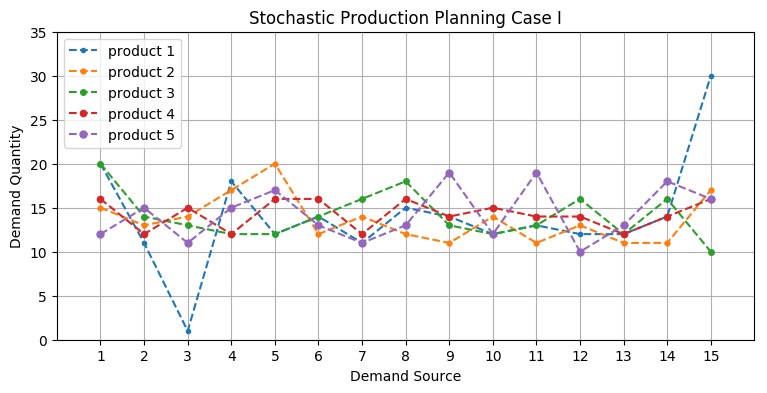

In [480]:

using PyPlot
figure(figsize = (9, 4))
x = 1:15
for i = 1:5
    plot(x, S_graph[i, :], ".--", markersize = (5 + i))
end
xticks(1:1:15)
axis([0,16,0,35])
xlabel("Demand Source")
ylabel("Demand Quantity")
title("Stochastic Production Planning Case I")
legend(["product 1","product 2","product 3","product 4","product 5"])
grid()

### Graph Interpreation
[Since value of q is different each time, we choose one of the value and save it to continue our discussion of the graph] <br><br>
From the graph above, product 1 and 4 fluctuate more than the other three products. Product 1 reaches the lowest demand quantity at Demand Source = 3, and reaches maxima at Demand Source = 15. This happens is becuase to maintain the higher possible profit, the larger amount of raw materials is needed. Therefore, it is not pratical to produce a larger amount. 


### Case II: Choose $r$ ahead of time, and $q$ after $d$ is known

In [481]:
# Data for case 2

#given demand is known 
# true_demand = [60 60 60 60 60]
#true_demand = [40 70 70 60 60]
# true_demand = [70 45 45 70 70]
# the number of raw material we purchased from cast 1
# r1

In [482]:

# 2nd case: the amount of raw materials (r) is known 
using JuMP, Cbc, Gurobi
m = Model(solver = CbcSolver())
@variable(m, r2[1:M] >= 0)
@variable(m, q2[1:N] >= 0) #quantity of n products to be produced
@constraint(m, r2 .>= A*q2)    #material constraint
@constraint(m, q2 .<= C)   # capacity constraint
@constraint(m, q2 .== S_graph*π) #use S_graph here to keep S from changing in order to have better discussion
@expression(m, cost, c.*r2)   
@objective(m, Max, -sum(cost) + sum(p .*q2))
solve(m)

q2_solved = getvalue(q2)
r2_solved = getvalue(r2)
o2 = getobjectivevalue(m)

println("The number of materials to buy:")
print_with_color(:light_blue, "\t", r2_solved, "\n\n")
print("Quantity of products we should produce: ")
print_with_color(:light_magenta, q2_solved,"\n")
print("The expected profit: ")
print_with_color(:red, o2,"\n")

S1 = min.(q2_solved*ones(1,K),D)
print("The actual profit: ")
print_with_color(:green, -sum(c.*r2_solved) + sum(p .*S1*π))

The number of materials to buy:
	[10.2077, 14.9593, 18.072, 14.9286, 16.307, 9.3652, 13.1486, 11.4306, 14.1887, 17.0448]

Quantity of products we should produce: [14.34, 13.48, 14.05, 14.28, 14.36]
The expected profit: 2871.597738
The actual profit: 2625.9531380000003

 ** Explanation: ** <br>
For part 2 case 2, we used  S(minimum of quantity(q) and Demand(D)) we derived in part 2 case 1. From case 1, we know that quantity of each product is managed to make the optimal profit with the number of raw material needed is unknown. Thus, for part 2, since the true demand is known, we compute the optimal profit. <br>
The purpose of case 2 is to see if we force quantity of products(q) to be equal to S*π, which is the true demand, what will happen to the expected profit and actual profit. The result is that the difference between those profit is about 200 which is much smaller than that in case 1. The main possible is because we sometimes get lower value than D*π. For example in case 1, if some of q values are small than that of D, we will end up getting q*π. And this time, even though we force q2 = S*π, similarly, we will have q2 = q1*π*π. 




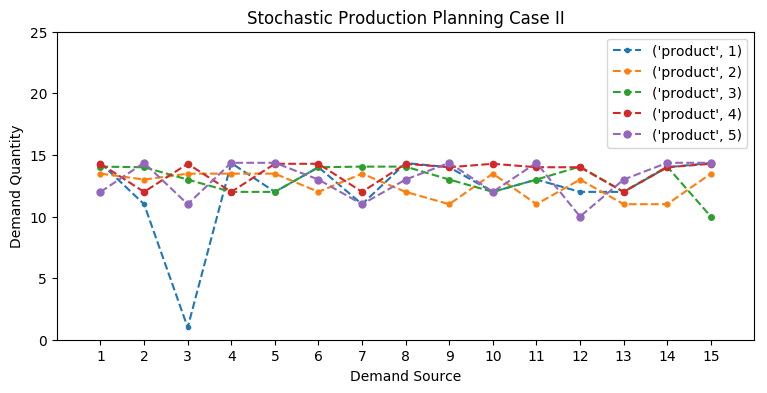

PyObject <matplotlib.legend.Legend object at 0x1b3747410>

In [478]:
using PyPlot
figure(figsize = (9, 4))
x = 1:15
for i = 1:5
    plot(x, S1[i, :], ".--", markersize = (5 + i), label = ("product",i))
end
xticks(1:1:15)
axis([0,16,0,25])
xlabel("Demand Source")
ylabel("Demand Quantity")
title("Stochastic Production Planning Case II")
legend()

### Graph Interpreation

From the graph above, unlike graph 1, only product 2 fluctuates more than the other four products at Demand source = 3. 


## 4. Results and discussion ##

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

 Use plots (see `PyPlot` examples from class), or you can display results in a table like this:

| Tables        | Are          | Cool  |
| ------------- |:-------------| -----:|
| col 3 is      |right-aligned |\$1600 |
|  colons       | align columns|  \$12 |
| zebra stripes |    are neat  |   \$1 |

### 4.A. Feel free to add subsections

#### 4.A.a. or subsubsections

## 5. Conclusion ##

[Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.]

For part 2, we find that the expectation we had for stage 2 based on stage 1 does not really match the result we got in the end. Even though the fact that product 3 has the highest hierarchy in production is not surprised, the results for other products are totally different. To find out why this is happening, we might build more models with different situations. For example, we may add more constraints such as overtime labor or production time and see what will happen to quantity of these products. 